In [1]:
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import torch
from torch import Tensor
from rich import print
import torch
from time import perf_counter
from typing import List, Tuple
import numpy as np

from transformers import BertModel, BertTokenizer


# now plot the embeddings
import matplotlib.pyplot as plt
import mplcursors

%matplotlib ipympl

from utils import plot_2D

In [2]:
# define model
model_name = "bert-base-uncased"

# define the tokenizer and the model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

In [3]:
# test data for the exploration
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"

in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"

in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!"
input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

## Sentence Embedding with Bert

In [4]:
def bert_sentence_embed(input_sentence: str) -> Tensor:
    """A function to generate sentence embedding using Bert

    Args:
        input_sentence (str): The sentence to embed

    Returns:
        Tensor: Tensor output for the sentence embedding
    """

    input_ids = tokenizer.encode(input_sentence, add_special_tokens=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
        sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    return sentence_embedding

In [5]:
embed_list = []
# model_name = 'bert-base-uncased'

for text in input_text_lst_news:
        sen_emb = bert_sentence_embed(text)
        embed_list.append(sen_emb)
concatenated_sent_tensor = torch.cat(embed_list)
# Convert the concatenated tensor to a numpy array
sent_numpy_array = concatenated_sent_tensor.numpy()

# Reshape the numpy array into a 1 by 768 array
sent_numpy_array = sent_numpy_array.reshape(len(embed_list), embed_list[0].shape[1])

print(sent_numpy_array[0, :10])

[-0.02826825 -0.433928   -0.06237846  0.11480708  0.47438848 -0.07815573
  0.45150292  0.45011812 -0.34748185  0.02657982]

In [6]:
# Perform PCA for 2D visualization
# convert the 768-dimensional array to 2-dimentional array for plotting purpose
PCA_model = PCA(n_components=2)
PCA_model.fit(sent_numpy_array)
sent_low_dim_array = PCA_model.transform(sent_numpy_array)

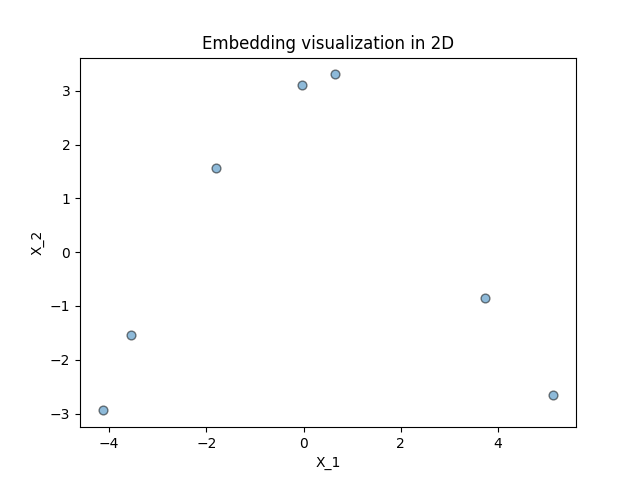

In [7]:
plot_2D(sent_low_dim_array[:,0], sent_low_dim_array[:,1], input_text_lst_news)

## Sentence Embedding with sentence-transformer model

In [8]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

In [9]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [10]:
embed_list = []
# model_name = 'bert-base-uncased'

for text in input_text_lst_news:
        sen_emb = model.encode(text)
        embed_list.append(sen_emb)
concatenated_sent_tensor = np.concatenate(embed_list)

# Reshape the numpy array into a 1 by 768 array
sent_numpy_array = concatenated_sent_tensor.reshape(len(embed_list), len(embed_list[0]))

print(sent_numpy_array[0, :10])

[-0.03113911  0.06399768 -0.04083293  0.04744512  0.09586464 -0.02172546
  0.06663951 -0.067983   -0.03599304 -0.03910673]

In [11]:
# Perform PCA for 2D visualization
# convert the 768-dimensional array to 2-dimentional array for plotting purpose
PCA_model = PCA(n_components=2)
PCA_model.fit(sent_numpy_array)
sent_low_dim_array = PCA_model.transform(sent_numpy_array)

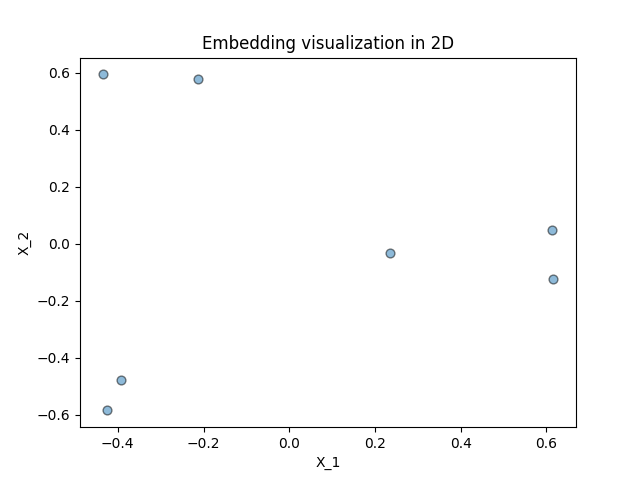

In [12]:
plot_2D(sent_low_dim_array[:,0], sent_low_dim_array[:,1], input_text_lst_news)